<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2-rddunlap23/datasets/sat_scores.csv'

with open(sat_filepath,'r') as f:
    data = [row.strip().split(',') for row in f]

data_dic = {row[0]:row[1:] for row in zip(*data)}
data_dic

{'Math': ('510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'),
 'Rate': ('82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'),
 'State': ('CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df_sat = pd.DataFrame(data_dic)
df = pd.read_csv(sat_filepath)
print df_sat.head()
print df.head()

print df['Math'].dtype
print df_sat['Math'].dtype

  Math Rate State Verbal
0  510   82    CT    509
1  513   81    NJ    499
2  515   79    MA    511
3  505   77    NY    495
4  516   72    NH    520
  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
int64
object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
data_dictionary = {
    ('State','object'):'This includes 50 States, DC, and ALL',
    ('Rate', 'int'): 'Good question...',
    ('Verbal','int'): 'Average verbal score out of 800 for students in given state',
    ('Math','int'): 'Average math score out of 800 for studends in given state',
    'Dimensions':('52 rows by 4 columns')
}

data_dictionary

{'Dimensions': '52 rows by 4 columns',
 ('Math', 'int'): 'Average math score out of 800 for studends in given state',
 ('Rate', 'int'): 'Good question...',
 ('State', 'object'): 'This includes 50 States, DC, and ALL',
 ('Verbal',
  'int'): 'Average verbal score out of 800 for students in given state'}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

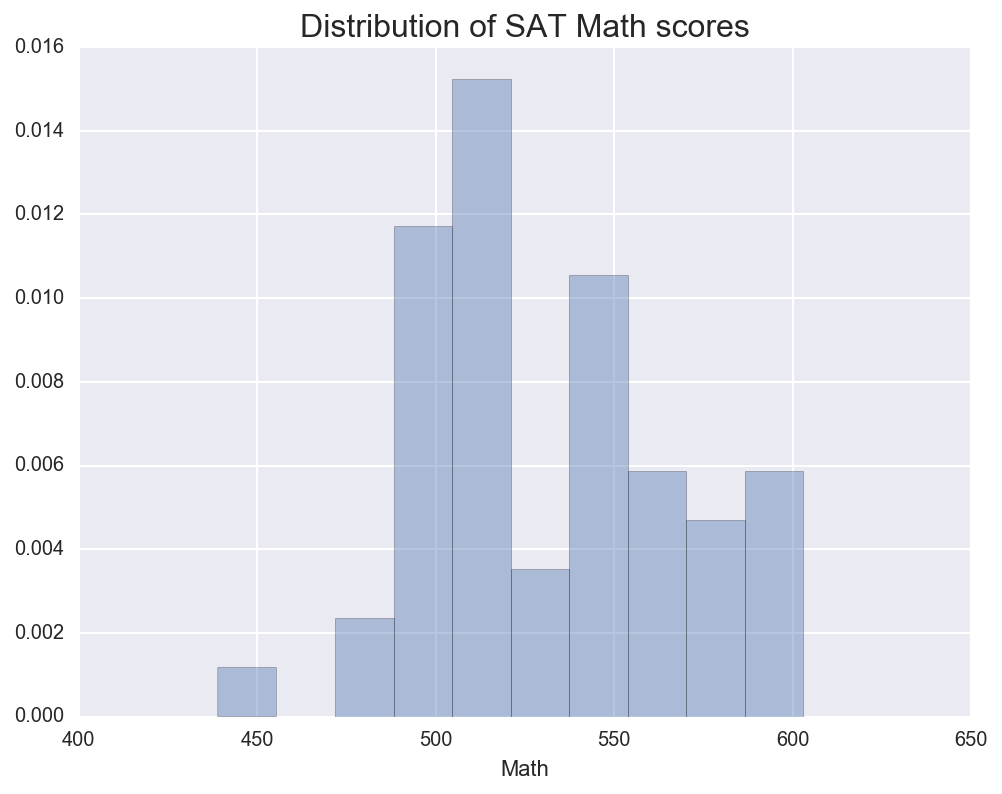

In [6]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()
ax = sns.distplot(df['Math'],kde=False,norm_hist=True,bins=10)
ax.set_title('Distribution of SAT Math scores', fontsize=16)

plt.show()

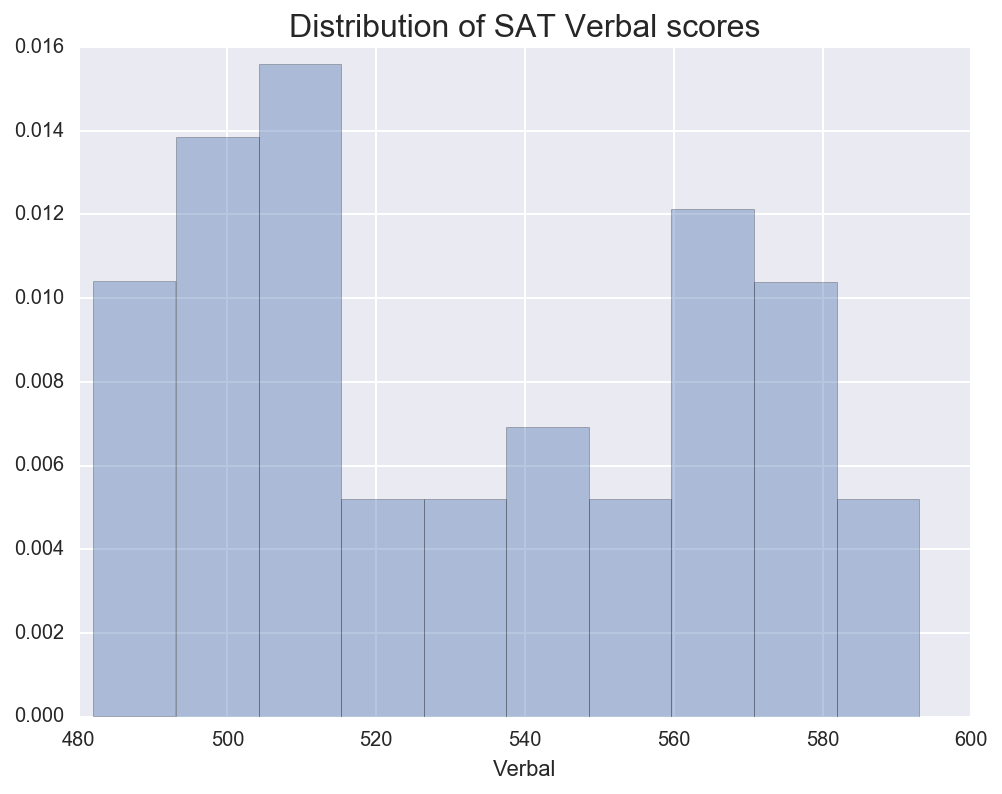

In [7]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()
ax = sns.distplot(df['Verbal'],kde=False,norm_hist=True,bins=10)
ax.set_title('Distribution of SAT Verbal scores', fontsize=16)

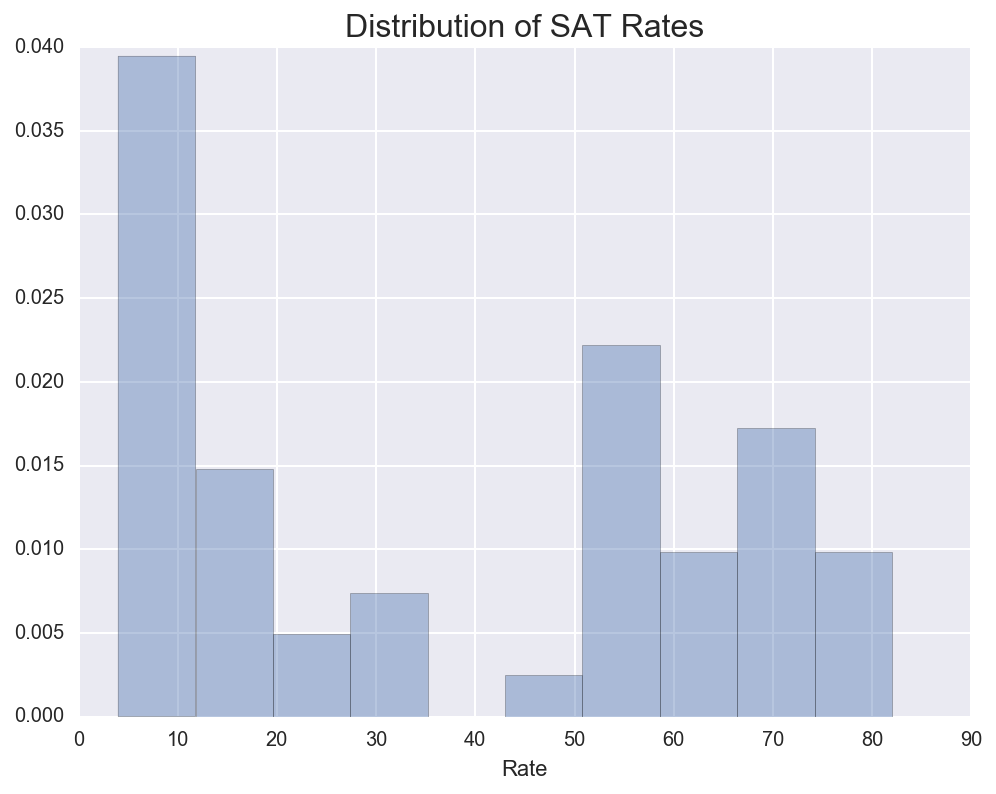

In [8]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca()
ax = sns.distplot(df['Rate'],kde=False,norm_hist=True,bins=10)
ax.set_title('Distribution of SAT Rates', fontsize=16)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

The pairwise plots shows that there it a very strong positive correlation between studends math and verbal scores.
There is a much weaker negative correlation between rates and verbal/match scores. 

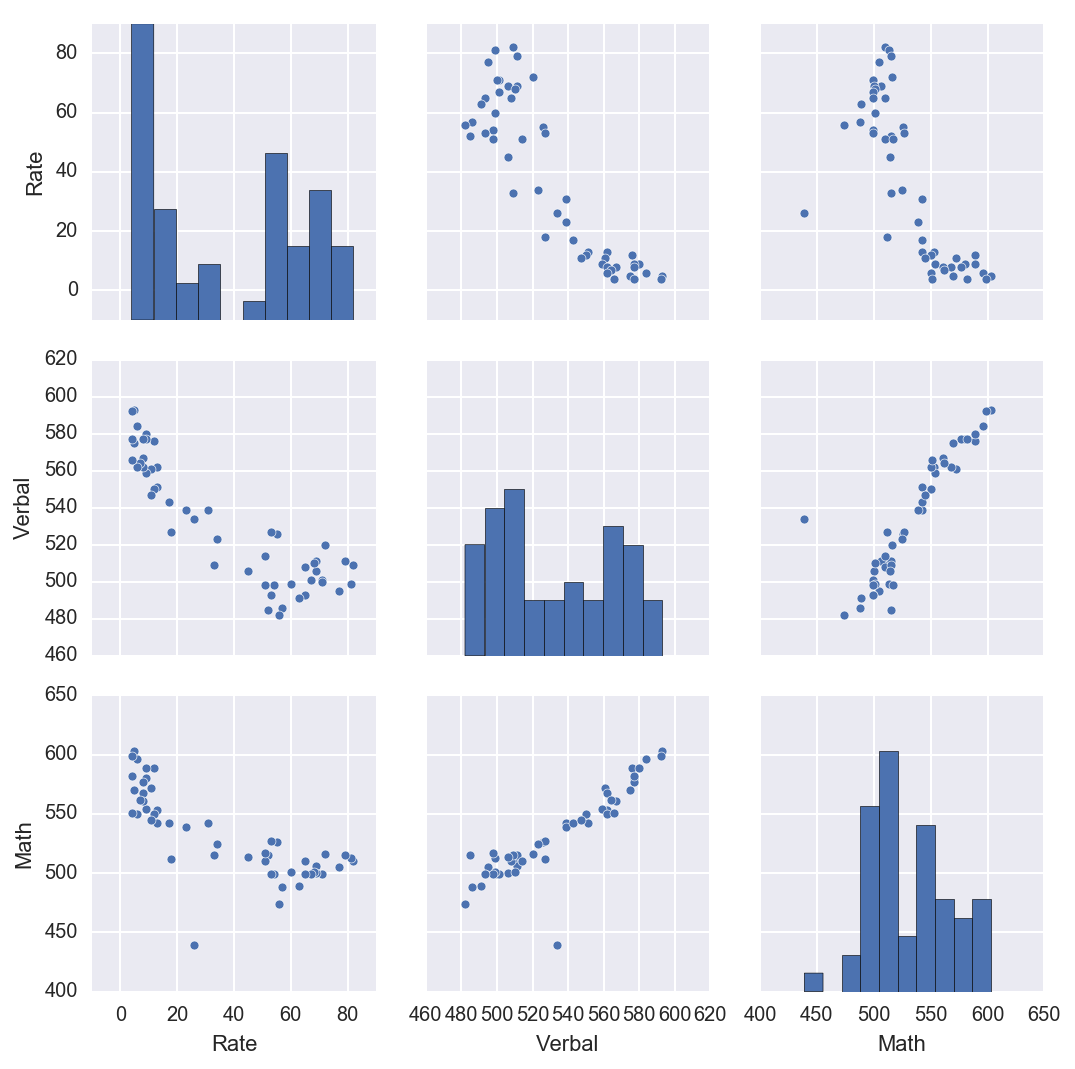

In [9]:
sns.pairplot(df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

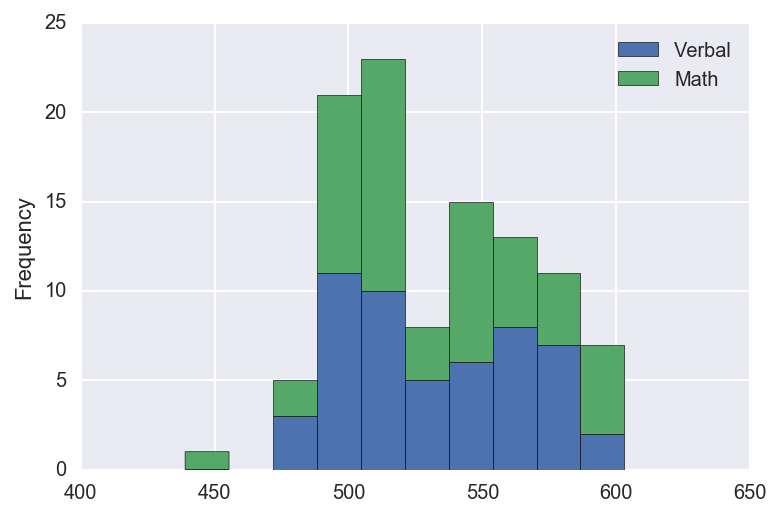

In [10]:
df[['Verbal','Math']].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

A box plot is a good way to represent multiple sets of data in one visualization for quick and easy comparison. Rate is not on the same scale as the math and verbal scores so is not meant to be compared directly to the other two scores. 

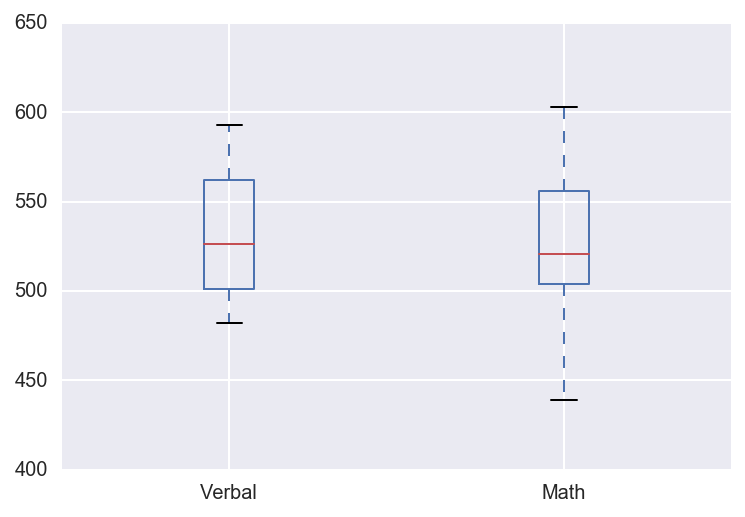

In [11]:
df[['Verbal','Math']].plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


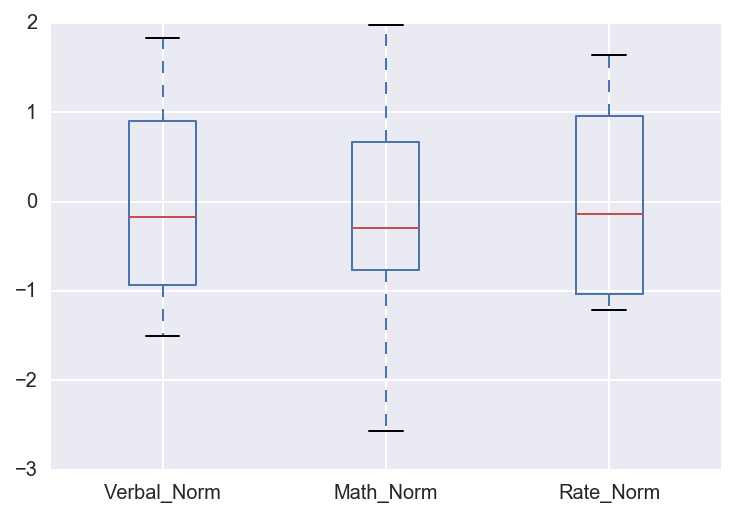

In [12]:
#Creating function to append normalized versions of column
def norm_column(df,column):
    n_name = column + '_Norm'
    df[n_name] = (df[column] -  df[column].mean()) / df[column].std()
    return df

df = norm_column(df,'Verbal')
df = norm_column(df,'Math')
df = norm_column(df,'Rate')

df[['Verbal_Norm','Math_Norm','Rate_Norm']].plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




There are 24 states that have a verbal score above the mean. This means the mean is slightly greater than the median
which means there is a small right skew to the data

In [13]:
verbal_mean_mask = (df['Verbal'] > df['Verbal'].mean())
df[verbal_mean_mask].describe()
df[verbal_mean_mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 26 to 50
Data columns (total 7 columns):
State          24 non-null object
Rate           24 non-null int64
Verbal         24 non-null int64
Math           24 non-null int64
Verbal_Norm    24 non-null float64
Math_Norm      24 non-null float64
Rate_Norm      24 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ KB


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

This list is 2 items longer. The median would be the average of the 26th and 27th elements so elements 27 - 52 
will be above median. The distribution has a small right skew which puts the mean to the right of the median
which is why there are more elements in filter above. 

In [14]:
verbal_median_mask = (df['Verbal'] > df['Verbal'].median())
df[verbal_median_mask].describe()
df[verbal_median_mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 19 to 50
Data columns (total 7 columns):
State          26 non-null object
Rate           26 non-null int64
Verbal         26 non-null int64
Math           26 non-null int64
Verbal_Norm    26 non-null float64
Math_Norm      26 non-null float64
Rate_Norm      26 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.6+ KB


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [15]:
df['Score_Diff'] = df['Verbal'] - df['Math']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
State          52 non-null object
Rate           52 non-null int64
Verbal         52 non-null int64
Math           52 non-null int64
Verbal_Norm    52 non-null float64
Math_Norm      52 non-null float64
Rate_Norm      52 non-null float64
Score_Diff     52 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [16]:
top_verbal = df.sort_values('Score_Diff').iloc[0:10,:]
top_math = df.sort_values('Score_Diff').iloc[-10:,:]

print top_verbal.head(3)
print '\n'
print top_math.sort_values('Score_Diff',ascending=False).head(3)

   State  Rate  Verbal  Math  Verbal_Norm  Math_Norm  Rate_Norm  Score_Diff
21    HI    52     485   515    -1.414698  -0.458143   0.543780         -30
23    CA    51     498   517    -1.023559  -0.402610   0.507152         -19
1     NJ    81     499   513    -0.993471  -0.513675   1.605981         -14


   State  Rate  Verbal  Math  Verbal_Norm  Math_Norm  Rate_Norm  Score_Diff
27    OH    26     534   439     0.059597  -2.568376  -0.408539          95
29    WV    18     527   512    -0.151017  -0.541441  -0.701560          15
50    MS     4     566   551     1.022402   0.541441  -1.214347          15


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


There is a very strong positive correlation between math and verbal: 0.899871
Rate is strong negatively correlatd with both math and verbal: -0.773746 and -0.886432 respectively

In [17]:
df2 = df.drop(['State','Verbal_Norm','Math_Norm','Rate_Norm'],axis=1)
df2.corr()

,Rate,Verbal,Math,Score_Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Score_Diff,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

#Count: Number of non null observations
#Mean: Mean of column
#Std: Standard deviation of colum
#Min: Smallest value in column
#25%: Lower quartile
#50%: Median
#75%: Upper quartile
#max: Largest value of column

In [52]:
df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,2872.200000,19.960000,6.00000,10.040000,19.600000,0.360000,0.020000,0.100000,1.580000,13.600000,...,4.000000,15.800000,0.500000,1.160000,19.600000,0.920000,6.70000,0.160000,0.220000,16.300000
std,129.182816,14.863647,2.54951,8.673984,10.261579,0.397492,0.044721,0.070711,1.269646,21.501163,...,1.847972,11.584472,0.441588,0.996494,19.998125,0.712039,4.05586,0.134164,0.109545,9.782638
min,2757.000000,3.900000,3.00000,1.100000,4.000000,0.100000,0.000000,0.000000,0.200000,3.000000,...,2.000000,7.000000,0.100000,0.200000,4.500000,0.200000,2.00000,0.000000,0.100000,3.000000
25%,2792.000000,8.500000,5.00000,3.400000,15.000000,0.100000,0.000000,0.100000,0.600000,3.000000,...,2.400000,10.000000,0.100000,0.300000,5.000000,0.300000,4.00000,0.100000,0.200000,13.000000
50%,2798.000000,18.100000,6.00000,8.700000,24.000000,0.100000,0.000000,0.100000,1.600000,4.000000,...,3.900000,12.000000,0.400000,0.900000,11.000000,0.800000,6.00000,0.100000,0.200000,16.500000
75%,2956.000000,29.200000,6.00000,14.500000,25.000000,0.500000,0.000000,0.100000,2.100000,6.000000,...,5.500000,14.000000,0.800000,2.000000,25.500000,1.500000,9.50000,0.300000,0.200000,19.000000
max,3058.000000,40.100000,10.00000,22.500000,30.000000,1.000000,0.100000,0.200000,3.400000,52.000000,...,6.200000,36.000000,1.100000,2.400000,52.000000,1.800000,12.00000,0.300000,0.400000,30.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

1. The covariance matrix is similar to a correlation matrix where they both measure how much two random variables
change together. The main difference being that it is difficult to interpret the stregth of the relationship
by the covariance as it's hard to interpret the magnitude. Correlation is a normalized measure of covariance where the magnitude (between -1 and 1) gives an indication of the strength of the relationship (-1 = perfectly negatively correlated 0 = not correlated at all, 1 = perfectly positively correlated)
2. You divide the covariane by the product of the standard deviations of the two variables
3. It's a normalized value and the magnitude of the correlation gives clear measure of strength of relationship of variables.

In [53]:
df.cov()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
n,16688.200,1794.3350,261.500,1056.1400,929.850,50.1850,2.0950,4.975000e+00,148.8550,-974.400,...,218.8000,-776.950,55.1000,122.9850,-1194.0250,86.6450,174.0750,15.3350,7.0700,-351.3250
alcohol-use,1794.335,220.9280,32.650,128.5795,138.605,5.4555,0.2310,5.175000e-01,18.7040,-203.020,...,27.2025,-131.885,6.5125,14.6230,-218.3825,10.4935,36.6225,1.8705,0.7485,-29.8975
alcohol-frequency,261.500,32.6500,6.500,19.5000,21.000,0.9000,0.0000,0.000000e+00,2.8500,-36.750,...,3.7250,-23.000,0.9250,2.0250,-29.2500,1.4500,5.0000,0.2750,0.0000,-10.8750
marijuana-use,1056.140,128.5795,19.500,75.2380,79.445,3.2495,0.1115,2.775000e-01,10.9535,-113.380,...,15.6850,-74.765,3.7950,8.4595,-120.9425,6.0665,21.1525,1.0695,0.3890,-23.3275
marijuana-frequency,929.850,138.6050,21.000,79.4450,105.300,2.8800,0.1350,2.500000e-01,11.9650,-193.200,...,17.2750,-111.600,3.8750,8.8050,-191.9500,6.4600,33.6000,1.1800,0.3850,-6.1000
cocaine-use,50.185,5.4555,0.900,3.2495,2.880,0.1580,0.0035,1.000000e-02,0.4615,-3.345,...,0.6450,-2.560,0.1650,0.3630,-3.4450,0.2560,0.5600,0.0455,0.0135,-1.6225
crack-use,2.095,0.2310,0.000,0.1115,0.135,0.0035,0.0020,2.500000e-03,0.0130,-0.240,...,0.0375,-0.145,0.0075,0.0210,-0.3775,0.0145,-0.0175,0.0035,0.0045,0.3425
heroin-use,4.975,0.5175,0.000,0.2775,0.250,0.0100,0.0025,5.000000e-03,0.0375,-0.050,...,0.0775,-0.100,0.0175,0.0425,-0.5250,0.0300,0.0500,0.0050,0.0075,0.2750
hallucinogen-use,148.855,18.7040,2.850,10.9535,11.965,0.4615,0.0130,3.750000e-02,1.6120,-17.510,...,2.2775,-11.305,0.5475,1.2140,-18.5725,0.8755,3.4925,0.1515,0.0505,-3.7925
hallucinogen-frequency,-974.400,-203.0200,-36.750,-113.3800,-193.200,-3.3450,-0.2400,-5.000000e-02,-17.5100,462.300,...,-25.3250,244.650,-5.1250,-12.1950,397.5500,-9.1400,-59.7750,-1.9700,-0.2900,-34.9750


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [99]:
drug_data_filepath = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/drug_use_by_age/drug-use-by-age.csv'
df = pd.read_csv(drug_data_filepath)
df.info()
df
#All 17 rows have data so there is no missing data. A number of columns are objects instead of floats so
#we will need to fill in the - values with 0 we can plot columns and get statistics around them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [97]:
#Replace - values with 0's. 
df = df.applymap(lambda x: 0 if x == '-' else x)


#Recast all of the objects as floats so we can perform statistical analyis and plot
for x in df.dtypes[df.dtypes=='object'].index:
    if x != 'age':
        df[x] = df[x].map(float)
    #print df[x].unique()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0


Question to answer: Is there a relationship between alcohol use and marijuana use? 

Deliverable: Provide a report to group that utilizes visualizations to clearly illustrate if any relationship
exists between marijuana and alcohol. Also provide any available numerical analyis to support analysis.

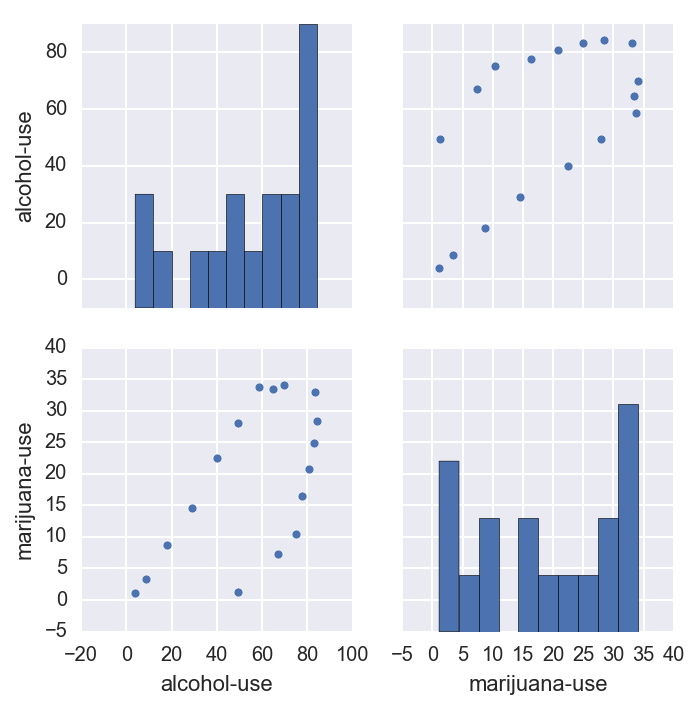

In [137]:
sns.pairplot(df[['alcohol-use','marijuana-use','age']])

The first visualization we use to inspect the relationship between marijuana and alcohol use is a pair plot. From this visualization we can see there is a positive correlation between the two variables. This is illustrated by the positive slope when plotting the two variables against each other. The relationship doesn't look particularly strong however as the points are not grouped very tightly. We will be able to better quantify this relationship by looking at the correlcation next. 

In [146]:
df[['alcohol-use','marijuana-use','age']].corr()

,alcohol-use,marijuana-use
alcohol-use,1.000000,0.594165
marijuana-use,0.594165,1.000000


We can use correlation to get a numerical measure of the strength of the relationship in the change of the two 
variables. The correlation of 0.59 confirms our findings in the pair plot that there is a modest positive correlation
between the two variables. 

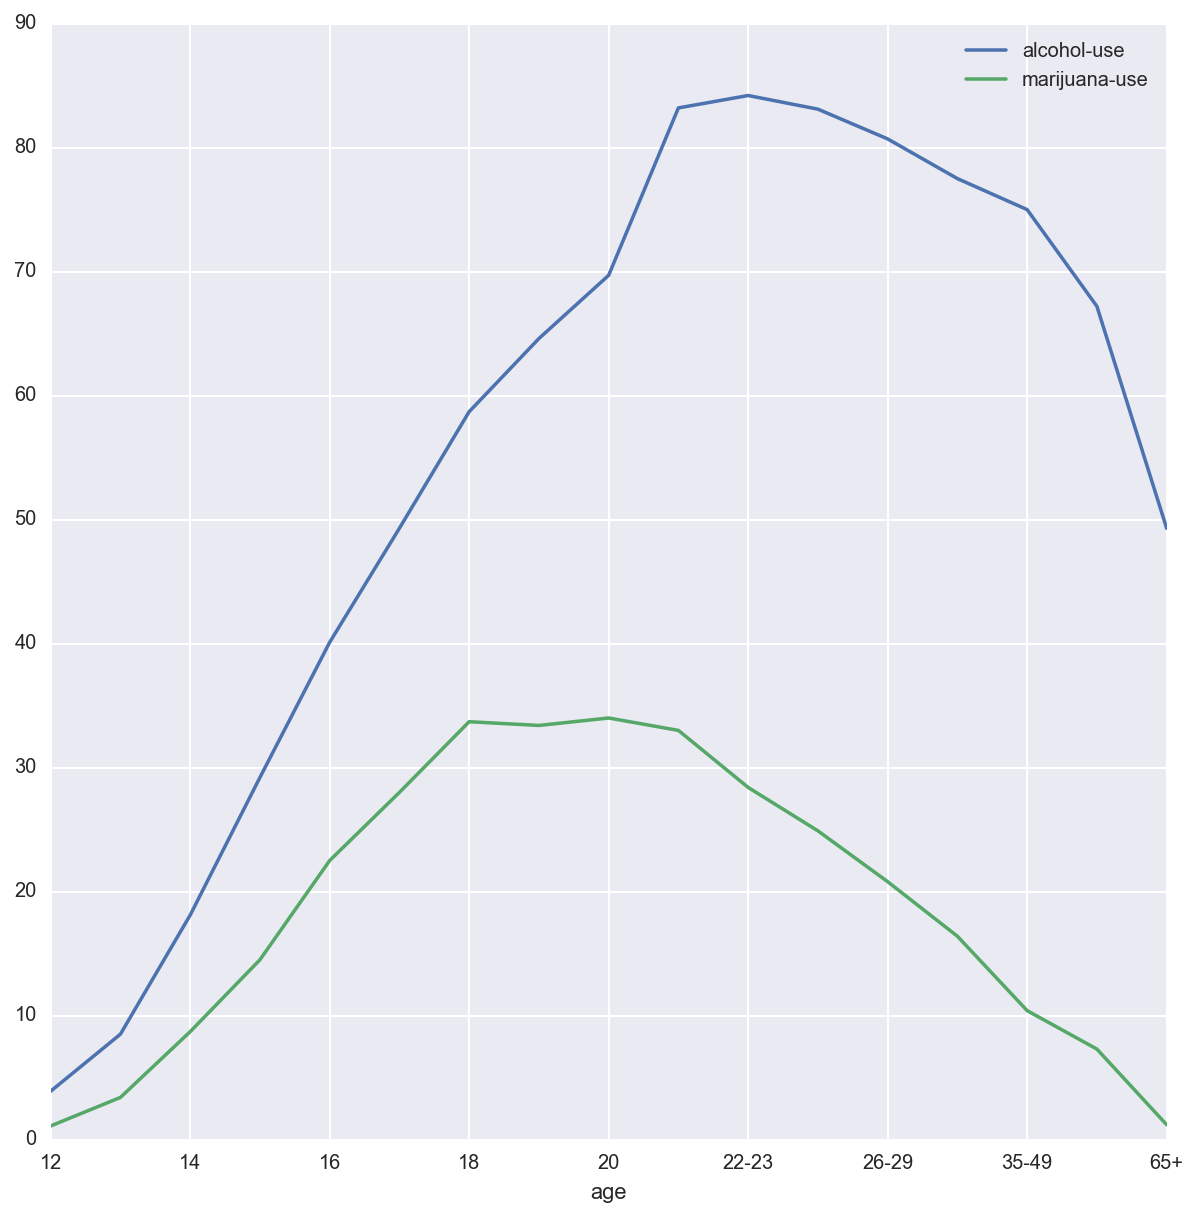

In [139]:
df[['alcohol-use','marijuana-use','age']].plot(kind='line', x='age',figsize=(10,10))

The final visualization is to look at alcohol and marijuana use by age group. From this line graph we can see
that they roughly follow the same trend. Given this analysis we can conclude that there is a relationship between alcohol and marijuana use. 

That said while we can show that there is a relationship between marijuana and alcohol we do not know if there is a causal relationship. This would require more granular data so that 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.